In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
% matpllotlib inline

UsageError: Line magic function `%` not found.


In [2]:
import os
os.getcwd()

'C:\\DSML\\Regression\\LR_Till_Cloud'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'Admission_Prediction.csv',
 'Advertising.csv',
 'Linear_Regression_practise.ipynb',
 'Position_Salaries.csv',
 'Untitled.ipynb']

In [4]:
data= pd.read_csv('Advertising.csv') # Reading the data file
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
for column in data.columns:
    print(f'{column} has {data[column].isnull().sum()} null values')

Unnamed: 0 has 0 null values
TV has 0 null values
radio has 0 null values
newspaper has 0 null values
sales has 0 null values


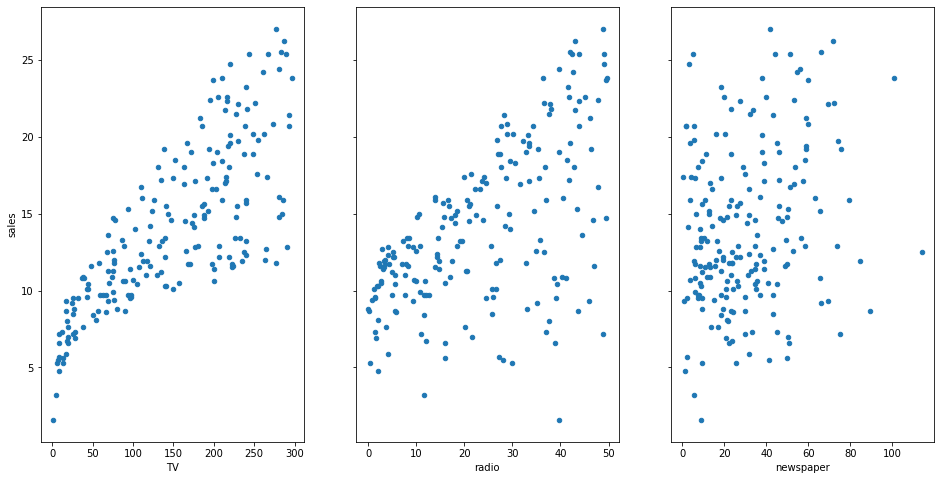

In [8]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot.scatter(x='TV', y='sales', ax=axs[0], figsize=(16, 8))# doing this differently so to say it can be done in both ways
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

In [9]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [10]:
data.columns[1:]

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Another way of sub plotting

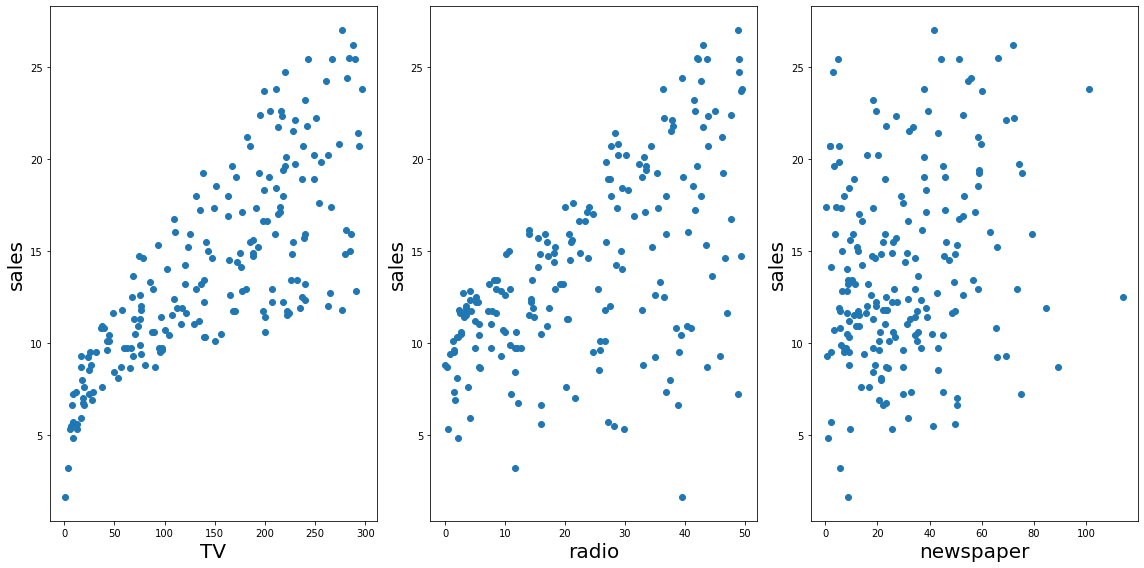

In [11]:
plt.figure(figsize=(16,8), facecolor='white')
plotnumber = 1

for column in data.columns[1:]:
    if plotnumber<=3 :
        ax = plt.subplot(1,3,plotnumber)
        #data.plot(kind='scatter', x=column, y=data['sales'])
        plt.scatter(data[column],data['sales'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('sales',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [12]:
# creating linear regression for each feature
feature_cols = ['TV']
X = data[feature_cols]
y = data['sales']

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127694
[0.04753664]


This means that with 1000 dollars spending in TV add, sales increate by 47 dollars
The linear regression equation will y = 0.04753664*x + 7.032593549127694

In [13]:
#lets say we invested 125 in TV add, the sales will increase
0.04753664*125 + 7.032593549127694

12.974673549127694

In [14]:
#the same value will be predicted by the model
lm.predict([[125]])

array([12.9746736])

# plotting least squared line

In [15]:
x_new = pd.DataFrame({'TV':[X.TV.min(),X.TV.max()]})
x_new

,TV
0,0.7
1,296.4


In [16]:
lm.predict(x_new)

array([ 7.0658692 , 21.12245377])

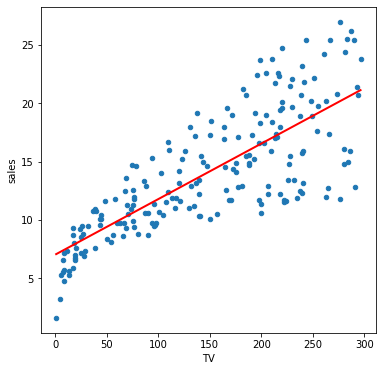

In [17]:
plt.rcParams['figure.figsize'] = 6,6
data.plot.scatter(x='TV', y='sales')
plt.plot(x_new,lm.predict(x_new), c='red', linewidth=2)

In [18]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV', data=data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [19]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           1.47e-42
Time:                        09:07:42   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model interpretaion

Model interpretaion: https://www.youtube.com/watch?v=U7D1h5bbpcs

S statistic - assessing the significance of the model by comparing with a model of no features - inrercept only model. The H0 in this case is this 2 models are equal and the H-alpha is these 2 models are different.
F statistic and the p value gives us an idea whether to reject the H0. The higher the F statistics score and the lower the p value helps us to reject the null hypothesis

similarly T statistic of each feature gives the model signifance of the each feature with the p value. The higher the T statistic score and the lower the p value the more signifcant the model is and we can reject the H0

# Now considering the whole data set:

In [20]:
# creating linear regression for each feature
feature_cols = ['TV','radio','newspaper']
X = data[feature_cols]
y = data['sales']

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [21]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           1.58e-96
Time:                        09:07:55   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

the feature newspaper can be ignored given the T stat score is very less as in less sigficant

Handling Categorical Predictors with Two Categories
Till now, all the predictors have been numeric. What if one of the predictors is categorical?

We’ll create a new feature called Scale, and shall randomly assign observations as small or large:

In [22]:
len(data)

200

In [23]:
import numpy as np
np.random.seed(12345)
num_1 = np.random.rand(len(data))
num_1

array([9.29616093e-01, 3.16375555e-01, 1.83918812e-01, 2.04560279e-01,
       5.67725029e-01, 5.95544703e-01, 9.64514520e-01, 6.53177097e-01,
       7.48906638e-01, 6.53569871e-01, 7.47714809e-01, 9.61306736e-01,
       8.38829794e-03, 1.06444377e-01, 2.98703714e-01, 6.56411183e-01,
       8.09812553e-01, 8.72175914e-01, 9.64647597e-01, 7.23685347e-01,
       6.42475328e-01, 7.17453621e-01, 4.67599007e-01, 3.25584678e-01,
       4.39644606e-01, 7.29689083e-01, 9.94014586e-01, 6.76873712e-01,
       7.90822518e-01, 1.70914258e-01, 2.68492758e-02, 8.00370244e-01,
       9.03722538e-01, 2.46762104e-02, 4.91747318e-01, 5.26255167e-01,
       5.96366010e-01, 5.19575451e-02, 8.95089528e-01, 7.28266180e-01,
       8.18350011e-01, 5.00222753e-01, 8.10189409e-01, 9.59685257e-02,
       2.18950044e-01, 2.58719062e-01, 4.68105754e-01, 4.59373203e-01,
       7.09509780e-01, 1.78053006e-01, 5.31449884e-01, 1.67742229e-01,
       7.68813918e-01, 9.28170549e-01, 6.09493658e-01, 1.50183495e-01,
      

# difference between np.randon.rand and np.random.randn:


    
    rand generates an array of floats between 0 and 1 with uniform distribution
    randn generates and array of floats between 0 and 1 with normal distribution
    
plotting distributions: https://www.datacamp.com/community/tutorials/probability-distributions-python    

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

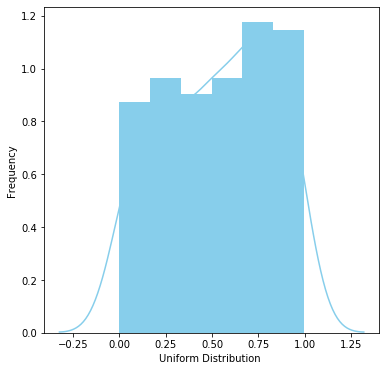

In [24]:
import seaborn as sns
plt.rcParams['figure.figsize'] = 6,6
ax = sns.distplot(num_1,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'normal Distribution ')]

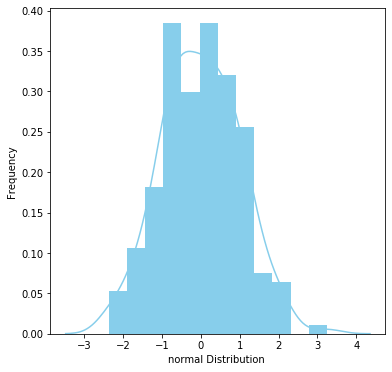

In [25]:
import numpy as np
np.random.seed(12345)
num_2 = np.random.randn(len(data))
plt.rcParams['figure.figsize'] = 6,6
ax = sns.distplot(num_2,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='normal Distribution ', ylabel='Frequency')

In [26]:
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
# initially set Size to small
data['Scale'] = 'small'
#then change roughly half to be large
mask_large = nums > 0.5
data.loc[mask_large, 'Scale'] = 'large'
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale
0,1,230.1,37.8,69.2,22.1,large
1,2,44.5,39.3,45.1,10.4,small
2,3,17.2,45.9,69.3,9.3,small
3,4,151.5,41.3,58.5,18.5,small
4,5,180.8,10.8,58.4,12.9,large


In [27]:
# create a new Series called IsLarge
data['IsLarge'] = data.Scale.map({'small':0, 'large':1})
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale,IsLarge
0,1,230.1,37.8,69.2,22.1,large,1
1,2,44.5,39.3,45.1,10.4,small,0
2,3,17.2,45.9,69.3,9.3,small,0
3,4,151.5,41.3,58.5,18.5,small,0
4,5,180.8,10.8,58.4,12.9,large,1


# Let's redo the multiple linear regression problem and include the IsLarge predictor/feature:

In [28]:
# creating linear regression for each feature
feature_cols = ['TV','radio','newspaper','IsLarge']
X = data[feature_cols]
y = data['sales']

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.9117013282568607
[ 0.04571982  0.18872814 -0.00109768  0.05742385]


In [29]:
i = 0
for col in feature_cols:
    print('the coef of {} is {}'.format(col,lm.coef_[i]))
    i = i + 1

the coef of TV is 0.04571982092436279
the coef of radio is 0.1887281431342786
the coef of newspaper is -0.0010976794483517195
the coef of IsLarge is 0.0574238508548278


In [30]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV + radio + newspaper + IsLarge', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     425.7
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           3.98e-95
Time:                        09:08:32   Log-Likelihood:                -386.15
No. Observations:                 200   AIC:                             782.3
Df Residuals:                     195   BIC:                             798.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9117      0.333      8.740      0.000       2.255       3.569
TV             0.0457      0.001     32.401      0.000       0.043       0.049
radio          0.1887      0.009     21.761      0.000       0.172       0.206
newspaper     -0.0011      0.006     -0.186      0.852      -0.013       0.011
IsLarge        0.0574      0.243      0.236      0.813      -0.422       0.537
==============================================================================
Omnibus:                       60.126   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.842
Skew:                          -1.323   Prob(JB):                     2.90e-33
Kurtosis:                       6.314   Cond. No.                         510.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Handling Categorical variables with More than Two Categories

Let's create a new column called Targeted Geography, and randomly assign observations to be rural, suburban, or urban:

In [31]:
import numpy as np

# set a seed for reproducibility
np.random.seed(1234567)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
# initially set Size to rural
data['Targeted Geography'] = 'rural'
#then mask suburban 
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data.loc[mask_suburban, 'Targeted Geography'] = 'suburban'
data.loc[mask_urban, 'Targeted Geography'] = 'urban'
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale,IsLarge,Targeted Geography
0,1,230.1,37.8,69.2,22.1,large,1,rural
1,2,44.5,39.3,45.1,10.4,small,0,rural
2,3,17.2,45.9,69.3,9.3,small,0,rural
3,4,151.5,41.3,58.5,18.5,small,0,rural
4,5,180.8,10.8,58.4,12.9,large,1,rural


In [32]:
dummies = pd.get_dummies(data['Targeted Geography'],prefix='Targeted_Geography')
data = pd.concat([data, dummies], axis=1)
data.tail()

,Unnamed: 0,TV,radio,newspaper,sales,Scale,IsLarge,Targeted Geography,Targeted_Geography_rural,Targeted_Geography_suburban,Targeted_Geography_urban
195,196,38.2,3.7,13.8,7.6,small,0,urban,0,0,1
196,197,94.2,4.9,8.1,9.7,small,0,urban,0,0,1
197,198,177.0,9.3,6.4,12.8,small,0,suburban,0,1,0
198,199,283.6,42.0,66.2,25.5,small,0,urban,0,0,1
199,200,232.1,8.6,8.7,13.4,large,1,rural,1,0,0


In [33]:
# creating linear regression for each feature
feature_cols = ['TV','radio','newspaper','IsLarge','Targeted_Geography_rural', 'Targeted_Geography_suburban']
X = data[feature_cols]
y = data['sales']

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)


2.8069473467880854
[ 0.0456604   0.18923508 -0.00149348  0.06595507  0.08665713  0.24318867]


In [34]:
i = 0
for col in feature_cols:
    print('the coef of {} is {}'.format(col,lm.coef_[i]))
    i = i + 1

the coef of TV is 0.04566039700316609
the coef of radio is 0.1892350841917212
the coef of newspaper is -0.001493479695889219
the coef of IsLarge is 0.06595507183690988
the coef of Targeted_Geography_rural is 0.0866571284667283
the coef of Targeted_Geography_suburban is 0.24318867087712154


In [35]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV + radio + newspaper + IsLarge+ Targeted_Geography_rural +Targeted_Geography_suburban', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     281.9
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           1.23e-92
Time:                        09:08:47   Log-Likelihood:                -385.82
No. Observations:                 200   AIC:                             785.6
Df Residuals:                     193   BIC:                             808.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.8069      0.370      7.581      0.000       2.077       3.537
TV                              0.0457      0.001     32.183      0.000       0.043       0.048
radio                           0.1892      0.009     21.627      0.000       0.172       0.206
newspaper                      -0.0015      0.006     -0.249      0.803      -0.013       0.010
IsLarge                         0.0660      0.244      0.270      0.787      -0.415       0.547
Targeted_Geography_rural        0.0867      0.296      0.292      0.770      -0.498       0.671
Targeted_Geography_suburban     0.2432      0.309      0.786      0.433      -0.367       0.853
==============================================================================
Omnibus:                       59.964   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.927
Skew:                          -1.331   Prob(JB):                     2.05e-32
Kurtosis:                       6.229   Cond. No.                         651.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Finding multicolenearity between columns

# using heatmap

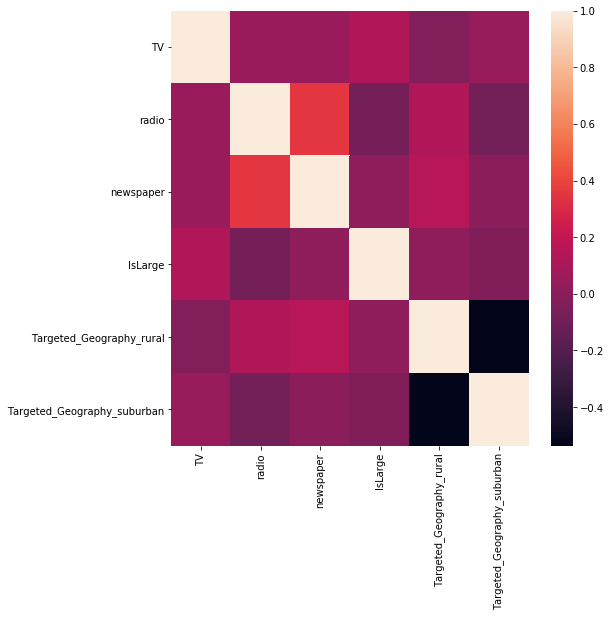

In [37]:
corr = data[feature_cols].corr()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8,8
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

In [38]:
corr

,TV,radio,newspaper,IsLarge,Targeted_Geography_rural,Targeted_Geography_suburban
TV,1.000000,0.054809,0.056648,0.131097,-0.027437,0.051274
radio,0.054809,1.000000,0.354104,-0.078994,0.131315,-0.083561
newspaper,0.056648,0.354104,1.000000,0.016979,0.154582,-0.003358
IsLarge,0.131097,-0.078994,0.016979,1.000000,0.018100,-0.032103
Targeted_Geography_rural,-0.027437,0.131315,0.154582,0.018100,1.000000,-0.535949
Targeted_Geography_suburban,0.051274,-0.083561,-0.003358,-0.032103,-0.535949,1.000000


# VIF

iF VIF of a column is more than 5 we may opt to reject the feature.

In [39]:
import statsmodels.api as smf
from scipy import stats

In [40]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales', 'Scale', 'IsLarge',
       'Targeted Geography', 'Targeted_Geography_rural',
       'Targeted_Geography_suburban', 'Targeted_Geography_urban'],
      dtype='object')

In [41]:
feature_cols = ['TV','radio','newspaper','IsLarge','Targeted_Geography_rural', 'Targeted_Geography_suburban']
data_selected = data[feature_cols]
for i in range(0, len(feature_cols)):
    y = data_selected.loc[:, data_selected.columns == feature_cols[i]]
    x = data_selected.loc[:, data_selected.columns != feature_cols[i]]
    model = smf.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "R Square value of {} column is {} keeping all other columns as features".format(
            feature_cols[i], (round(rsq, 2))
        )
    )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            feature_cols[i], vif)
        )


R Square value of TV column is 0.69 keeping all other columns as features
Variance Inflation Factor of TV column is 3.2 

R Square value of radio column is 0.71 keeping all other columns as features
Variance Inflation Factor of radio column is 3.45 

R Square value of newspaper column is 0.7 keeping all other columns as features
Variance Inflation Factor of newspaper column is 3.37 

R Square value of IsLarge column is 0.5 keeping all other columns as features
Variance Inflation Factor of IsLarge column is 2.01 

R Square value of Targeted_Geography_rural column is 0.52 keeping all other columns as features
Variance Inflation Factor of Targeted_Geography_rural column is 2.08 

R Square value of Targeted_Geography_suburban column is 0.43 keeping all other columns as features
Variance Inflation Factor of Targeted_Geography_suburban column is 1.74 



# Another way of coding VIF

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
#first convert the dataframe to an array
data_array = data[feature_cols].to_numpy()
data_array
#data.shape[1]

array([[230.1,  37.8,  69.2,   1. ,   1. ,   0. ],
       [ 44.5,  39.3,  45.1,   0. ,   1. ,   0. ],
       [ 17.2,  45.9,  69.3,   0. ,   1. ,   0. ],
       ...,
       [177. ,   9.3,   6.4,   0. ,   0. ,   1. ],
       [283.6,  42. ,  66.2,   0. ,   0. ,   0. ],
       [232.1,   8.6,   8.7,   1. ,   1. ,   0. ]])

In [44]:
vif = pd.DataFrame()
#the below takes only an array which is why we converted the dataframe to an array
vif["VIF"] = [variance_inflation_factor(data_array, i) for i in range(data_selected.shape[1])]
vif["Features"] = feature_cols
vif

,VIF,Features
0,3.197270,TV
1,3.448236,radio
2,3.371724,newspaper
3,2.006663,IsLarge
4,2.079071,Targeted_Geography_rural
5,1.744028,Targeted_Geography_suburban


In [45]:
data_selected.values

array([[230.1,  37.8,  69.2,   1. ,   1. ,   0. ],
       [ 44.5,  39.3,  45.1,   0. ,   1. ,   0. ],
       [ 17.2,  45.9,  69.3,   0. ,   1. ,   0. ],
       ...,
       [177. ,   9.3,   6.4,   0. ,   0. ,   1. ],
       [283.6,  42. ,  66.2,   0. ,   0. ,   0. ],
       [232.1,   8.6,   8.7,   1. ,   1. ,   0. ]])

# Another was of coding VIF

In [46]:
vif = [variance_inflation_factor(data_selected.values, i) for i in range(data_selected.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=data_selected.columns).T

,TV,radio,newspaper,IsLarge,Targeted_Geography_rural,Targeted_Geography_suburban
vif,3.19727,3.448236,3.371724,2.006663,2.079071,1.744028


# Assumptions of Linear Regression

https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0

https://www.youtube.com/watch?v=rw84t7QU2O0

https://www.youtube.com/watch?v=XIzYdw0bbrM

Let’s see the underlying assumptions: -
* The regression model is linear in terms of coefficients and error term.
* The mean of the residuals is zero.
* The error terms are not correlated with each other, i.e. given an error value; we cannot predict the next error value.
* The independent variables(x) are uncorrelated with the residual term, also termed as **exogeneity**. This, in layman term, generalises that in no way should the error term be predicted given the value of independent variables.
* The error terms have a constant variance, i.e. **homoscedasticity**.
* No Multicollinearity, i.e. no independent variables should be correlated with each other or affect one another. If there is multicollinearity, the precision of prediction by the OLS model decreases.
* The error terms are normally distributed.

# Proof of assumptions

In [47]:
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [48]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales', 'Scale', 'IsLarge',
       'Targeted Geography', 'Targeted_Geography_rural',
       'Targeted_Geography_suburban', 'Targeted_Geography_urban'],
      dtype='object')

In [49]:
# Split the data into train and test with 70% data being used for training
feature_cols = ['TV','radio','newspaper','IsLarge','Targeted_Geography_rural', 'Targeted_Geography_suburban']
X_stats = data[feature_cols]
y_stats = data['sales']
X_train, X_test, y_train, y_test = train_test_split(X_stats, y_stats, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Linear Regression using statsmodels to proof assumptions

In [50]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.params

TV                             0.048974
radio                          0.221836
newspaper                      0.017588
IsLarge                        0.619483
Targeted_Geography_rural       0.696145
Targeted_Geography_suburban    0.815321
dtype: float64

In [51]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1650.
Date:                Wed, 15 Jul 2020   Prob (F-statistic):                   5.92e-123
Time:                        09:10:23   Log-Likelihood:                         -279.12
No. Observations:                 140   AIC:                                      570.2
Df Residuals:                     134   BIC:                                      587.9
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [52]:
y_pred = results.predict(X_test)
residual = y_test - y_pred

# Normailty of Residual

To proof  - The error terms are normally distributed - plot a distplot or a kde histogram. See its almost a normal distribution centered around 0

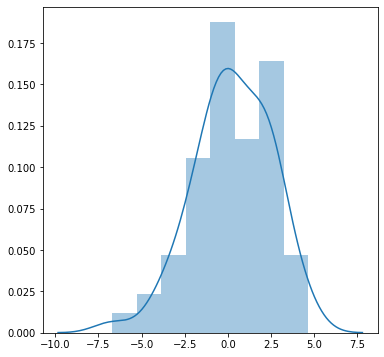

In [53]:
rcParams['figure.figsize'] = 6,6
sns.distplot(residual)

or ----------- though distplot is better

(array([ 1.,  0.,  2.,  5.,  8., 12., 11.,  8.,  9.,  4.]),
 array([-6.70855274, -5.57113015, -4.43370756, -3.29628497, -2.15886238,
        -1.02143979,  0.11598279,  1.25340538,  2.39082797,  3.52825056,
         4.66567315]),
 <a list of 10 Patch objects>)

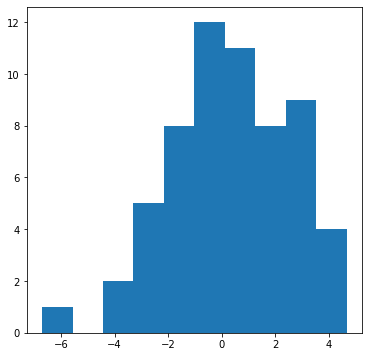

In [54]:
rcParams['figure.figsize'] = 6,6
plt.hist(residual)

# The mean of the residuals is zero

In [55]:
np.mean(residual)
#close to zero

0.27936504407659424

# Homoscedasticity

The error terms have a constant variance, i.e. **homoscedasticity**

Summary: There should not be any relation between the error/ residual and the y pred. If there is a relationship - as in error increases with increase in y pred or vice versa then the residual is heteroscedastic - and the fundamental assumption of Linear regreession is violated

simplest way to find out is by a scatter plot of y pred and residual

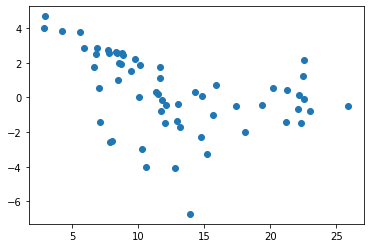

In [56]:
rcParams['figure.figsize'] = 6,4
plt.scatter(y_pred, residual)

# No autocorrelation of residuals

The error terms are not correlated with each other, i.e. given an error value; we cannot predict the next error value.

C:\Users\ayonh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


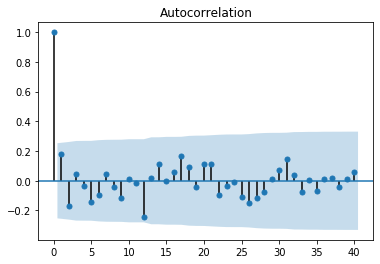

In [57]:
acf = sm.graphics.tsa.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

The residual is highly correlated with itself. The rest of the residuals are not correlated with each other

# Regularization

If the data is highly correletaed then go for L1/ Lasso because it helps bringing down those coeffs to 0 --- (Residual)**2 + lambda * sum of mod of coeff

If the data is not highly correletaed then got for L2/ Ridge ---- (Residual)**2 + lambda * sum of square of coeff

if we dont know if its correlated or not we use L3/Elastic Net -  a combination of L1, and L2

https://www.youtube.com/watch?v=9lRv01HDU0s
    
https://www.youtube.com/watch?v=0yI0-r3Ly40    

In [58]:
# creating linear regression
feature_cols = ['TV','radio','newspaper','IsLarge','Targeted_Geography_rural', 'Targeted_Geography_suburban']
X = data[feature_cols]
y = data['sales']

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.8069473467880854
[ 0.0456604   0.18923508 -0.00149348  0.06595507  0.08665713  0.24318867]


In [59]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(lm,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)
print(lm.score(X,y))

-3.1828712677151105
0.8975806136199


# Ridge Regression¶

In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [61]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-3.0907571179610778


In [63]:
rr100 = Ridge(alpha=100) #  R2 score with the best alpha value
rr100.fit(X, y)
rr100.score(X, y)

0.8973700186527602

# Lasso Regression

In [65]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\ayonh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209.41892256645343, tolerance: 0.43829494374999994
  positive)
C:\Users\ayonh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237.58739678675556, tolerance: 0.45029244375
  positive)
C:\Users\ayonh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.05010537489106, tolerance: 0.41992074374999994
  positive)


{'alpha': 1}
-3.0414058967513684


In [68]:
lr1 = Lasso(alpha=1) #  R2 score with the best alpha value
lr1.fit(X, y)
lr1.score(X, y)

0.8970235728389689

# Elastic Net

In [67]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
ENet=ElasticNet()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}
ENet_regressor=GridSearchCV(ENet,parameters,scoring='neg_mean_squared_error',cv=5)

ENet_regressor.fit(X,y)
print(ENet_regressor.best_params_)
print(ENet_regressor.best_score_)

C:\Users\ayonh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213.77964498694, tolerance: 0.43829494374999994
  positive)
C:\Users\ayonh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228.65976769490337, tolerance: 0.42183797500000003
  positive)
C:\Users\ayonh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245.24646769242855, tolerance: 0.45029244375
  positive)
C:\Users\ayonh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

{'alpha': 1, 'l1_ratio': 1}
-3.0414058967513684


In [69]:
er1 = ElasticNet(l1_ratio = 1, alpha=1) #  R2 score with the best alpha value
er1.fit(X, y)
er1.score(X, y)

0.8970235728389689

In [ ]:
# comparing model performance on test and train data -- though ssplitted from the same dataset which is not the ideal case

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [71]:
#fitting the best models with train data
er1.fit(X_train, y_train)
lr1.fit(X_train, y_train)
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [74]:
#comparing R2 for train and test data of each models
print(f'vanilla linear reg model on train score: {lm.score(X_train, y_train)}')
print(f'vanilla linear reg model on test score: {lm.score(X_test, y_test)}')
print('------------------')
print(f'elasticnet model train score: {er1.score(X_train, y_train)}')
print(f'elasticnet model test score: {er1.score(X_test, y_test)}')
print('------------------')
print(f'lasso model train score: {lr1.score(X_train, y_train)}')
print(f'lasso model test score: {lr1.score(X_test, y_test)}')
print('------------------')
print(f'ridge model train score: {rr100.score(X_train, y_train)}')
print(f'ridge model test score: {rr100.score(X_test, y_test)}')      

vanilla linear reg model on train score: 0.9040533598418234
vanilla linear reg model on test score: 0.8796330895271214
------------------
elasticnet model train score: 0.9063748032313736
elasticnet model test score: 0.8679417802015109
------------------
lasso model train score: 0.9063748032313736
lasso model test score: 0.8679417802015109
------------------
ridge model train score: 0.9066986660146972
ridge model test score: 0.8652515713958664


conclude: model performing fairly well on test....best model is plain/ vanilla LR

In [75]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)
prediction_ElasticNet=ENet_regressor.predict(X_test)

In [76]:
lasso_regressor.score(X_train,y_train)

-2.5757408583246386

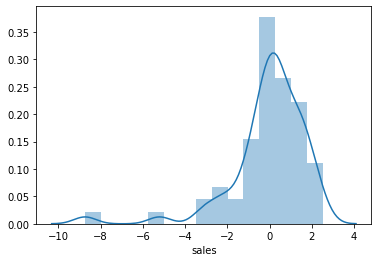

In [78]:
import seaborn as sns
sns.distplot(y_test-prediction_lasso)

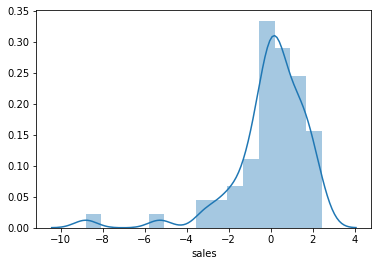

In [79]:
import seaborn as sns
sns.distplot(y_test-prediction_ridge)

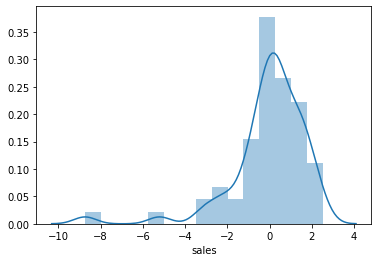

In [80]:
import seaborn as sns
sns.distplot(y_test-prediction_ElasticNet)

# New Data set - admissions data set

In [98]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [171]:
def Adjusted_R2(model_name,X,y):
    R2 = model_name.score(X,y)
    n = X.shape[0]
    p = X.shape[1]
    ad_R2 = 1-(1-R2)*(n-1)/(n-p-1)
    return ad_R2

In [172]:
admin =pd.read_csv('Admission_Prediction.csv')
admin.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [173]:
for col in admin.columns:
    print(f'the sum of null values in {col} is {admin[col].isnull().sum()}')
    print(f'the datatype of {col} is {admin[col].dtype}')
    print('---------------------------------')

the sum of null values in Serial No. is 0
the datatype of Serial No. is int64
---------------------------------
the sum of null values in GRE Score is 15
the datatype of GRE Score is float64
---------------------------------
the sum of null values in TOEFL Score is 10
the datatype of TOEFL Score is float64
---------------------------------
the sum of null values in University Rating is 15
the datatype of University Rating is float64
---------------------------------
the sum of null values in SOP is 0
the datatype of SOP is float64
---------------------------------
the sum of null values in LOR is 0
the datatype of LOR is float64
---------------------------------
the sum of null values in CGPA is 0
the datatype of CGPA is float64
---------------------------------
the sum of null values in Research is 0
the datatype of Research is int64
---------------------------------
the sum of null values in Chance of Admit is 0
the datatype of Chance of Admit is float64
-----------------------------

In [174]:
admin.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [175]:
admin['GRE Score'].fillna(admin['GRE Score'].mean(), inplace = True)
admin['TOEFL Score'].fillna(admin['TOEFL Score'].mean(), inplace = True)
admin['University Rating'].fillna(admin['University Rating'].mode()[0], inplace = True)

In [176]:
admin.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [177]:
admin = admin.drop('Serial No.', axis=1)
admin.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [178]:
X = admin.drop('Chance of Admit', axis=1)
y = admin['Chance of Admit']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000260F1F98048>,
      dtype=object)

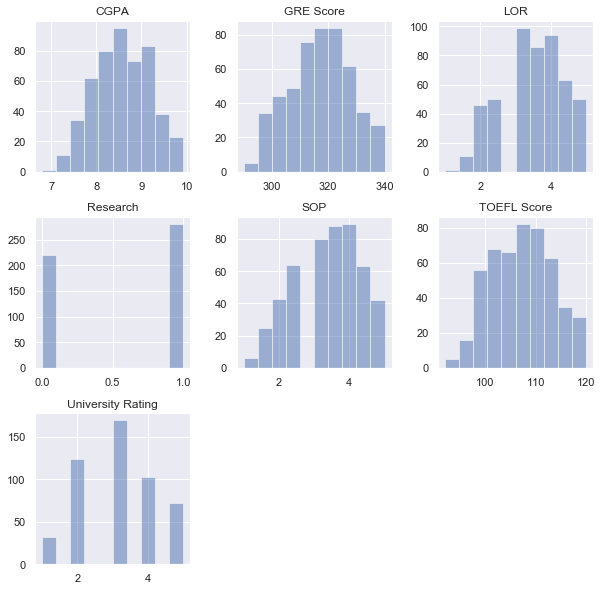

In [179]:
# check if features are normally distributed
X.hist(color = 'b', alpha = 0.5, figsize = (10,10))

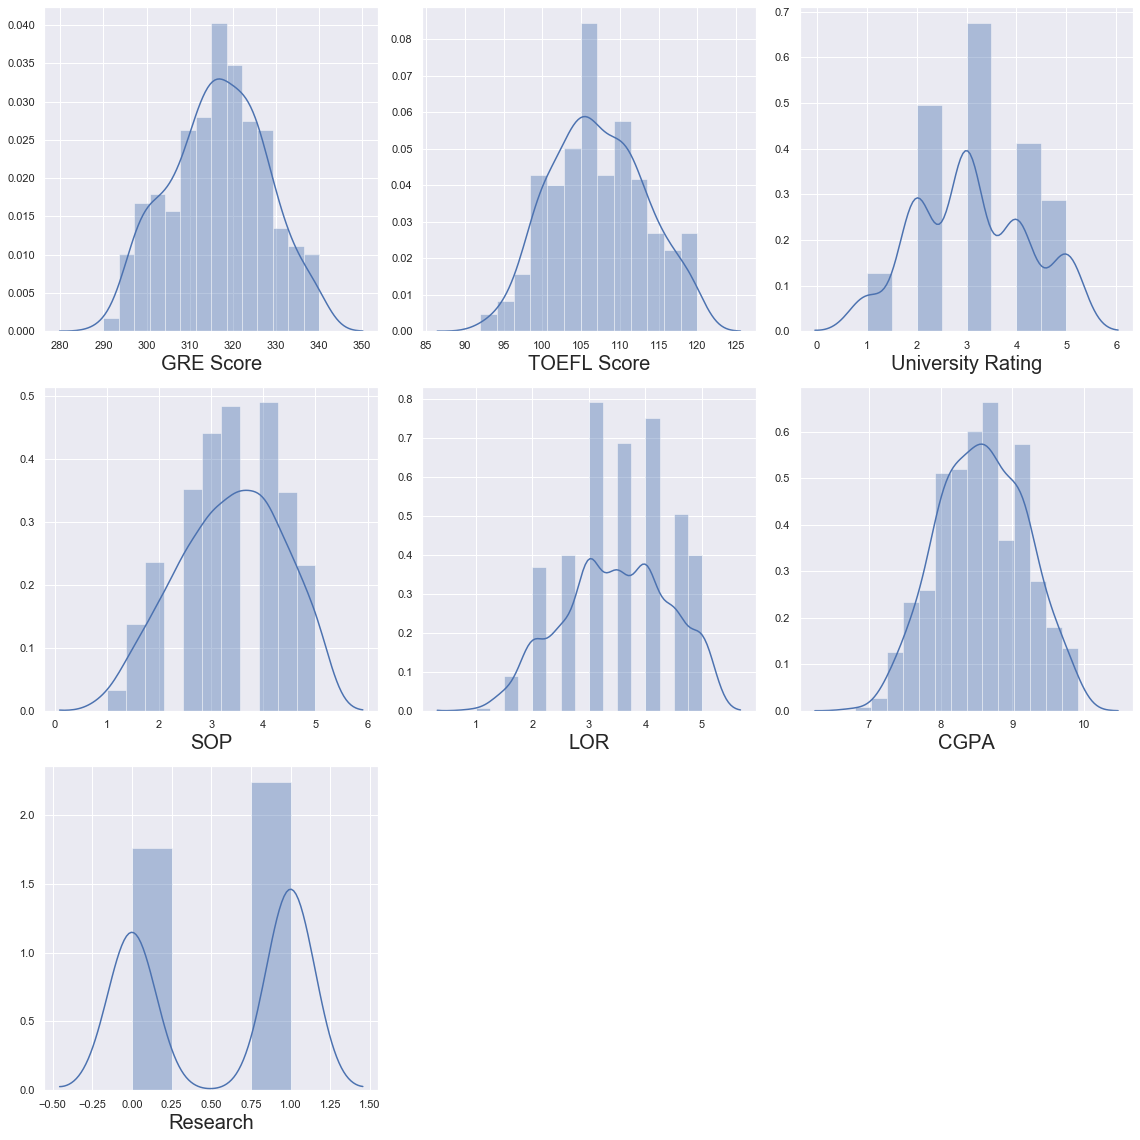

In [180]:
#or a better way to check if data is normally distributed
plt.figure(figsize=(16,16), facecolor='white')
plotnumber = 1

for column in X.columns:
    if plotnumber<=10 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.tight_layout()

conclude that the continuous features are normally distributed

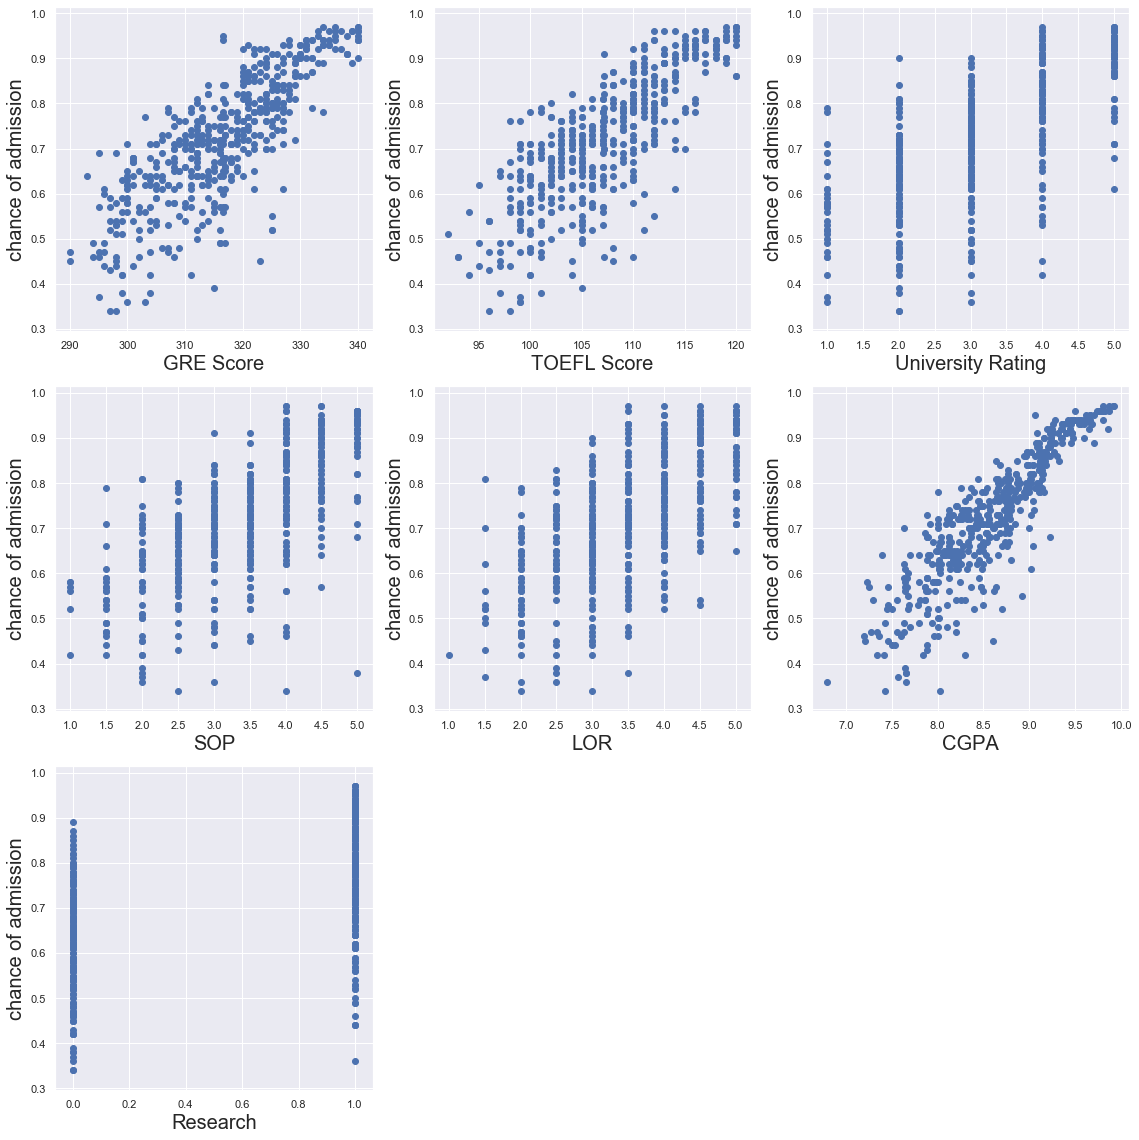

In [181]:
#finding out the relationship between the dependant and independant variable
plt.figure(figsize=(16,16), facecolor='white')
plotnumber = 1

for column in X.columns:
    if plotnumber<=10 :
        ax = plt.subplot(3,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('chance of admission',fontsize=20)
        plotnumber+=1
plt.tight_layout()

conclude that the features are lenearly related with the target

Scaling the data because the magnitude of different features are varying

In [182]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [183]:
#scaled dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.842741e+00,1.788542,0.782010,1.137360,1.098944,1.776806,0.886405
1,6.708143e-01,-0.031058,0.782010,0.632315,1.098944,0.485859,0.886405
2,5.124333e-15,-0.527313,-0.104623,-0.377773,0.017306,-0.954043,0.886405
3,4.905178e-01,0.465197,-0.104623,0.127271,-1.064332,0.154847,0.886405
4,-2.306679e-01,-0.692731,-0.991255,-1.387862,-0.523513,-0.606480,-1.128152


finding multicollenearity through VIF

In [184]:
vif = [variance_inflation_factor(X_scaled, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X.columns).T

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
vif,4.152735,3.793345,2.517272,2.776393,2.037449,4.654369,1.459411


finding multicollenearity through heatmap

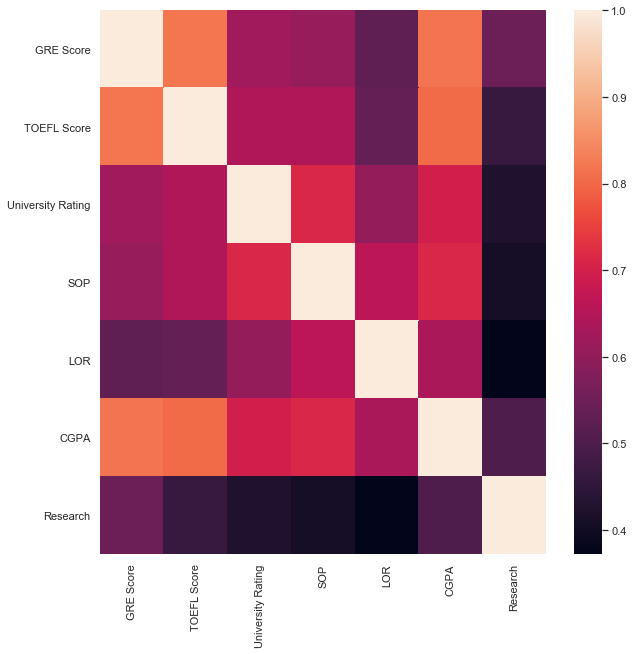

In [185]:
corr = X_scaled_df.corr()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,10
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

In [186]:
#splitting the data in train test first and will do cross val and hyper parameter tuning on train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.25, random_state=0)

conclude that the features are not multicollenear

# Plain Linear regression

In [187]:
#creating vanilla linear regression with cross_val

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
# print intercept and coefficients
print(f'intecept or bais: {LR.intercept_}')
print(f'coeff or weights: {LR.coef_}')

from sklearn.model_selection import cross_val_score
mse=cross_val_score(LR,X_train, y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(f'mean_mse: {mean_mse}')
print(f'R*2: {LR.score(X_train, y_train)}')
print(f'adjusted R2: {adjusted_R2(LR,X_train, y_train)}')

intecept or bais: 0.7207588983998475
coeff or weights: [0.02466634 0.01525625 0.00708979 0.00074659 0.01734768 0.07068725
 0.01209336]
mean_mse: -0.003565236062313996
R*2: 0.8279991807159545
adjusted R2: 0.8247185111383296


# Ridge

In [188]:
#creating ridge regression model
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_reg=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

ridge_reg.fit(X_train, y_train)
mean_mse=np.mean(mse)
print(f'mean_mse: {mean_mse}')
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

mean_mse: -0.003565236062313996
{'alpha': 5}
-0.003563612891922215


In [189]:
# rr5 = Ridge(alpha=5) #  R2 score with the best alpha value
rr5.fit(X_train, y_train)
print(f'R*2 of rr5: {rr5.score(X_train, y_train)}')
print(f'adjusted R2 of rr5: {adjusted_R2(rr5,X_train, y_train)}')

R*2 of rr5: 0.8278871049670036
adjusted R2 of rr5: 0.8246042977047938


In [190]:
# or ----creating another ridge regression model -- another way through ridge cv
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)
alpha_1 = ridgecv.alpha_
alpha_1

0.17325847448553255

In [191]:
ridge_model = Ridge(alpha=alpha_1)
ridge_model.fit(X_train, y_train)
print(f'R*2 of ridge_model: {ridge_model.score(X_train, y_train)}')
print(f'adjusted R2 of ridge_model: {adjusted_R2(ridge_model,X_train, y_train)}')

R*2 of ridge_model: 0.8279990283294336
adjusted R2 of ridge_model: 0.8247183558452539


# Lasso

In [192]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_reg=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X_train, y_train)
mean_mse=np.mean(mse)
print(f'mean_mse: {mean_mse}')
lasso_reg.fit(X_train, y_train)
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

mean_mse: -0.003565236062313996
{'alpha': 0.001}
-0.003562652629181858


In [193]:
lr001 = Lasso(alpha=.001) #  R2 score with the best alpha value
lr001.fit(X_train, y_train)
print(f'R*2 of lr001: {lr001.score(X_train, y_train)}')
print(f'adjusted R2 of lr001: {adjusted_R2(lr001,X_train, y_train)}')

R*2 of lr001: 0.8279150721535424
adjusted R2 of lr001: 0.8246327983254084


In [194]:
# or ----creating another lasso regression model -- another way through lasso cv
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)
alpha_1 = lasscv.alpha_
alpha_1

3.7081432877540656e-05

In [195]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before
Lasso_model = Lasso(alpha=alpha_1)
Lasso_model.fit(X_train, y_train)
print(f'R*2 of Lasso_model: {Lasso_model.score(X_train, y_train)}')
print(f'adjusted R2 of Lasso_model: {adjusted_R2(Lasso_model,X_train, y_train)}')

R*2 of Lasso_model: 0.8279990631862505
adjusted R2 of Lasso_model: 0.8247183913669147


# Elastic Net

In [196]:
#elastic net
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
ENet=ElasticNet()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}
ENet_regressor=GridSearchCV(ENet,parameters,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(f'mean_mse: {mean_mse}')
ENet_regressor.fit(X_train, y_train)
print(ENet_regressor.best_params_)
print(ENet_regressor.best_score_)

mean_mse: -0.003565236062313996
{'alpha': 0.001, 'l1_ratio': 0.5}
-0.0035616996872035777


In [197]:
er001 = ElasticNet(l1_ratio = 0.5, alpha=.001) #  R2 score with the best alpha value
er001.fit(X_train, y_train)
print(f'R*2 of rr5: {er001.score(X_train, y_train)}')
print(f'adjusted R2 of er001: {adjusted_R2(er001,X_train, y_train)}')

R*2 of rr5: 0.8279776212073667
adjusted R2 of er001: 0.8246965404129568


In [198]:
# or ----creating another elasticnet regression model -- another way through elasticnet cv
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(X_train, y_train)
alpha_1 = elasticCV.alpha_
print(alpha_1)
li_ratio = elasticCV.l1_ratio
print(li_ratio)

0.0013425278403837446
0.5


In [199]:
#now that we have best parameter, let's use elasticnet and see how well our data has fitted before
enet_model = ElasticNet(l1_ratio = li_ratio, alpha=alpha_1)
enet_model.fit(X_train, y_train)
print(f'R*2 of Lasso_model: {enet_model.score(X_train, y_train)}')
print(f'adjusted R2 of Lasso_model: {adjusted_R2(enet_model,X_train, y_train)}')

R*2 of Lasso_model: 0.8279604330508492
adjusted R2 of Lasso_model: 0.8246790244169417


In [224]:
def model_scorer_test_data(models,X,y):
    Model_name = []
    R2 = []
    adjusted_R2 = []
    mean_mse = []
    for i in models:
        Model_name.append(i)
        R2.append(models[i].score(X_test, y_test))
        r2 = models[i].score(X_test, y_test)
        n = X.shape[0]
        p = X.shape[1]
        ad_R2 = 1-(1-r2)*(n-1)/(n-p-1)
        adjusted_R2.append(ad_R2)
        y_pred = models[i].predict(X)
        mse = np.sqrt(1/len(y)*np.sum((y_pred - y)**2))
        mean_mse.append(mse)
    performance_df = pd.DataFrame({'Model Name':Model_name,'Rsquared':R2,'Adjusted R2':adjusted_R2, 'MSE':mean_mse})
    return performance_df        

In [225]:
models = {'LR':LR,'rr5':rr5,'ridge_model':ridge_model,'lr001':lr001,'Lasso_model':Lasso_model,'er001':er001,'enet_model':enet_model}
model_scorer_test_data(models,X_test,y_test)

,Model Name,Rsquared,Adjusted R2,MSE
0,LR,0.792218,0.779787,0.062585
1,rr5,0.791917,0.779468,0.062630
2,ridge_model,0.792209,0.779778,0.062586
3,lr001,0.793241,0.780871,0.062430
4,Lasso_model,0.792260,0.779831,0.062578
5,er001,0.792749,0.780350,0.062505
6,enet_model,0.792916,0.780527,0.062479


In [226]:
#lr001 is the best generalized model so we will save the model for re use

In [227]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(lr001, open(filename, 'wb'))

In [229]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

array([0.90866299])

In [230]:
filename = 'scaler_model.pickle'
pickle.dump(scaler, open(filename, 'wb'))

In [235]:
filename = 'scaler_model.pickle'
scaler = pickle.load(open(filename, 'rb'))
b=loaded_model.predict(scaler.transform([[310,130,5,4,5,10,0]]))
b

array([0.95682973])

In [ ]:
#freezing the dependancies

In [239]:
pip freeze

alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.12
anaconda-project==0.8.3
argh==0.26.2
asn1crypto==1.3.0
astroid==2.3.3
astropy==4.0
atomicwrites==1.3.0
attrs==19.3.0
autopep8==1.4.4
Babel==2.8.0
backcall==0.1.0
backports.functools-lru-cache==1.6.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
bcrypt==3.1.7
beautifulsoup4==4.8.2
bitarray==1.2.1
bkcharts==0.2
bleach==3.1.0
bokeh==1.4.0
boto==2.49.0
Bottleneck==1.3.2
certifi==2019.11.28
cffi==1.14.0
chardet==3.0.4
Click==7.0
cloudpickle==1.3.0
clyent==1.2.2
colorama==0.4.3
comtypes==1.1.7
conda==4.8.2
conda-build==3.18.11
conda-package-handling==1.6.0
conda-verify==3.4.2
contextlib2==0.6.0.post1
cryptography==2.8
cycler==0.10.0
Cython==0.29.15
cytoolz==0.10.1
dask==2.11.0
decorator==4.4.1
defusedxml==0.6.0
diff-match-patch==20181111
distributed==2.11.0
docutils==0.16
entrypoints==0.3
et-xmlfile==1.0.1
fastcache==1.1.0
filelock==3.0.12
flake8==3.7.9
Flask==1.1.1
fsspec==0.